# Least-Squares Method 활용

## 2차 함수에 데이터 피팅: $y = {\beta}_0 + {\beta}_1x + {\beta}_2{x}^2$


In [2]:
import numpy as np
from scipy import linalg

In [4]:
x = np.array([1,2.5, 3.5, 4, 5, 7, 8.5])
y = np.array([0.3, 1.1, 1.5, 2.0, 3.2, 6.6, 8.6])

n = x.shape[0]
X = np.zeros((n, 3))
X[:,0] = 1
X[:,1] = x
X[:,2] = x * x

beta, res, rank, s = linalg.lstsq(X, y)
print(beta)

[0.0578403  0.07701453 0.11262261]


## 간단히 그래프 그리기

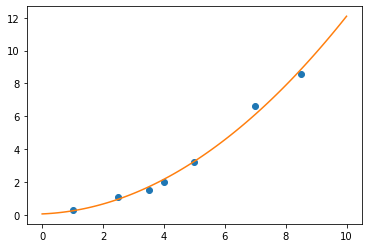

In [8]:
import matplotlib.pyplot as plt
plt.plot(x, y,'o')
xp = np.linspace(0, 10, 101)
yp = beta[0] + beta[1]*xp + beta[2]*xp*xp
plt.plot(xp, yp)
plt.show()

## 간단한 내부 함수
- ${x}^n$: x**n
- ${e}^x$: np.exp(x)
- $lnx$: np.log(x)
- ${log}_10x$: np.log10(x)
- $\pi$: np.pi
- $\sqrt{x}$: np.sqrt(x)
- sin(x): np.sin(x)
- sinh(x): np.sinh(x)
- ${sin}^{-1}(x)$: np.arcsinh(x)
- np.deg2rad(x)
- np.rad2deg(x)

## 함수에 벡터(1D array)가 입력으로 들어간다면?
- 벡터의 entry들에 개별적으로 함수를 취할 필요 없이 벡터를 입력으로 넣으면 개별 entry에 함수값을 취한뒤 벡터로 반환한다.

## 일반 함수 피팅 연습: $y = {\beta}_0 + {\beta}_1{e}^x + {\beta}_2 \cos{x} + {\beta}_3 \ln{x}$

[-0.42231256  0.02363227 -1.4235677  -1.12719118]


<ipython-input-17-ba4396580cb3>:17: RuntimeWarning: divide by zero encountered in log
  yp = beta[0] + beta[1]*np.exp(xp) + beta[2] * np.cos(xp) + beta[3] * np.log(xp)


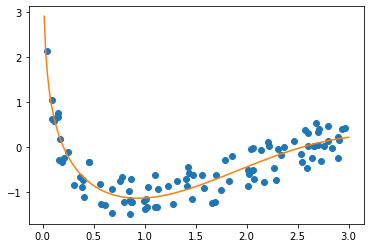

In [17]:
data = np.genfromtxt('../code/Ch.7 최소자승법을 활용한 데이터 피팅 및 그래프 그리기/p07_inp1.txt', delimiter=",")
x = data[:, 0]
y = data[:, 1]

n = x.shape[0]
X = np.zeros((n, 4))
X[:,0] = 1
X[:,1] = np.exp(x)
X[:,2] = np.cos(x)
X[:,3] = np.log(x)

beta, res, rank, s = linalg.lstsq(X, y)
print(beta)

plt.plot(x, y, 'o')
xp = np.linspace(0,3, 201)
yp = beta[0] + beta[1]*np.exp(xp) + beta[2] * np.cos(xp) + beta[3] * np.log(xp)
plt.plot(xp, yp)
plt.show()


# SVD 활용 흑백 이미지 압축
## 이미지는 행렬 혹은 벡터 데이터
- 흑백 이미지
    - 2D pixel 행렬 데이터
        - 0~255 or 0~1
- 컬러 이미지
    - 2D Pixel 행렬 데이터
        - (R,G,B)
        
## Truncated SVD
- U, s, VT = linalg.svd(A)
- A_trunc = U[:, :t] * s[:t] @ VT[:t, :] (A의 이미지를 근사)


## 압축률
- 원본 흑백 복구: U @ linalg.diagsvd(s, m, n) @ VT
- truncated SVD: U[:, :t] * s[:t] @ VT[:t, :]
- 합 = t\*(m+n+1)
- **압출률**(%) = t * (m+n+1)\/(m*n) x 100

## Truncated SVD로 재건축한 이미지 보기

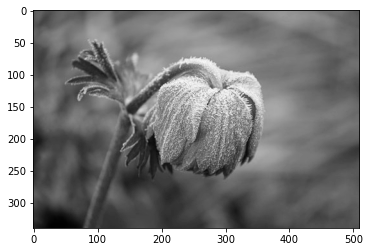

In [20]:
from skimage import io as imgio
img_mat = imgio.imread('../code/Ch.7 SVD를 사용하여 흑백 이미지 압축/flower.jpg', as_gray=True)
m = img_mat.shape[0]
n = img_mat.shape[1]

U, s, VT = linalg.svd(img_mat)

A_recon = U @ linalg.diagsvd(s, m, n) @ VT
plt.imshow(A_recon, cmap='gray')
plt.show()

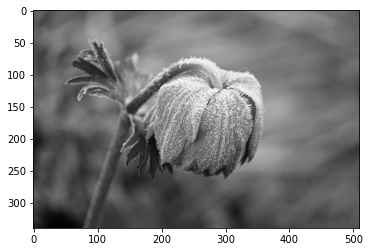

In [21]:
t = 200
img_trunc = U[:,:t] * s[:t] @ VT[:t, :]
plt.imshow(img_trunc, cmap='gray')
plt.show()

# 선형 변환 시각화
- custom Animatin 함수 사용
- from cutom_ani import lin_tran_ani